C:\Users\shashi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\shashi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\shashi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_

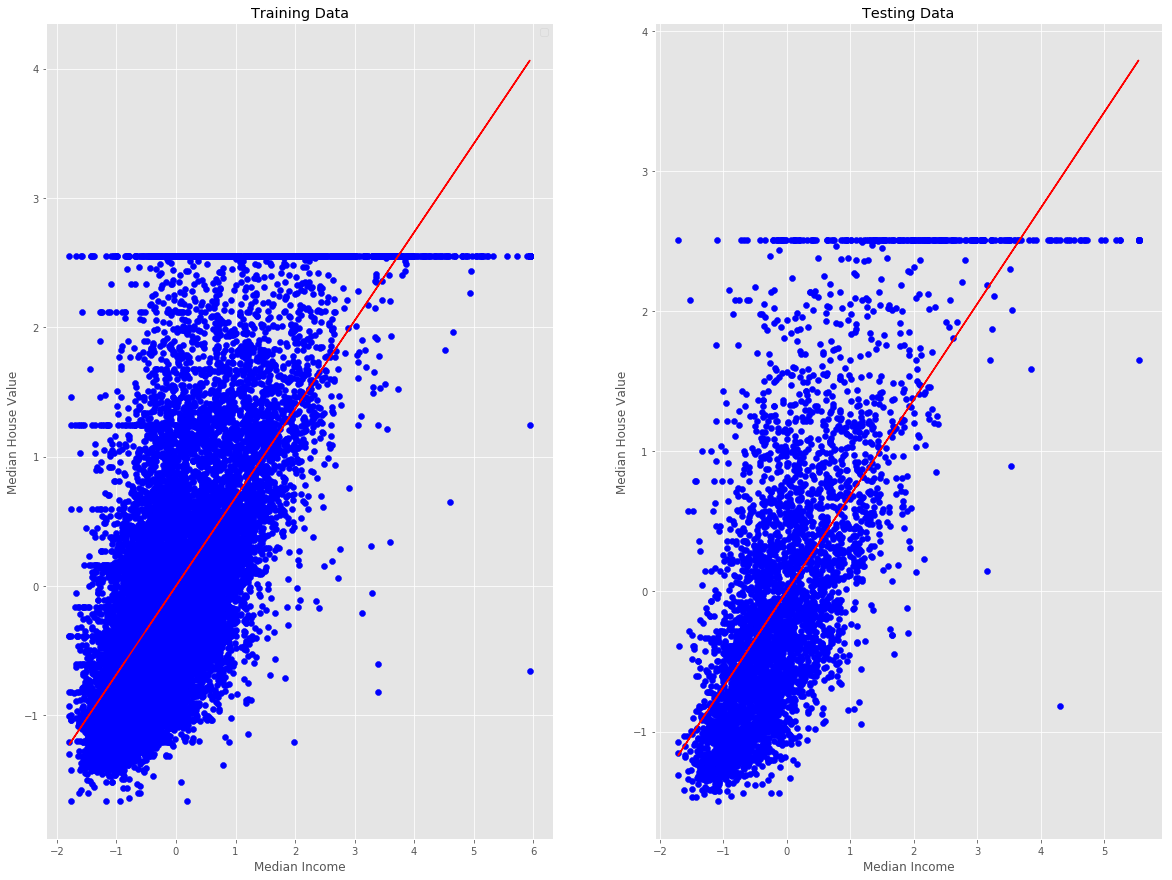

No handles with labels found to put in legend.


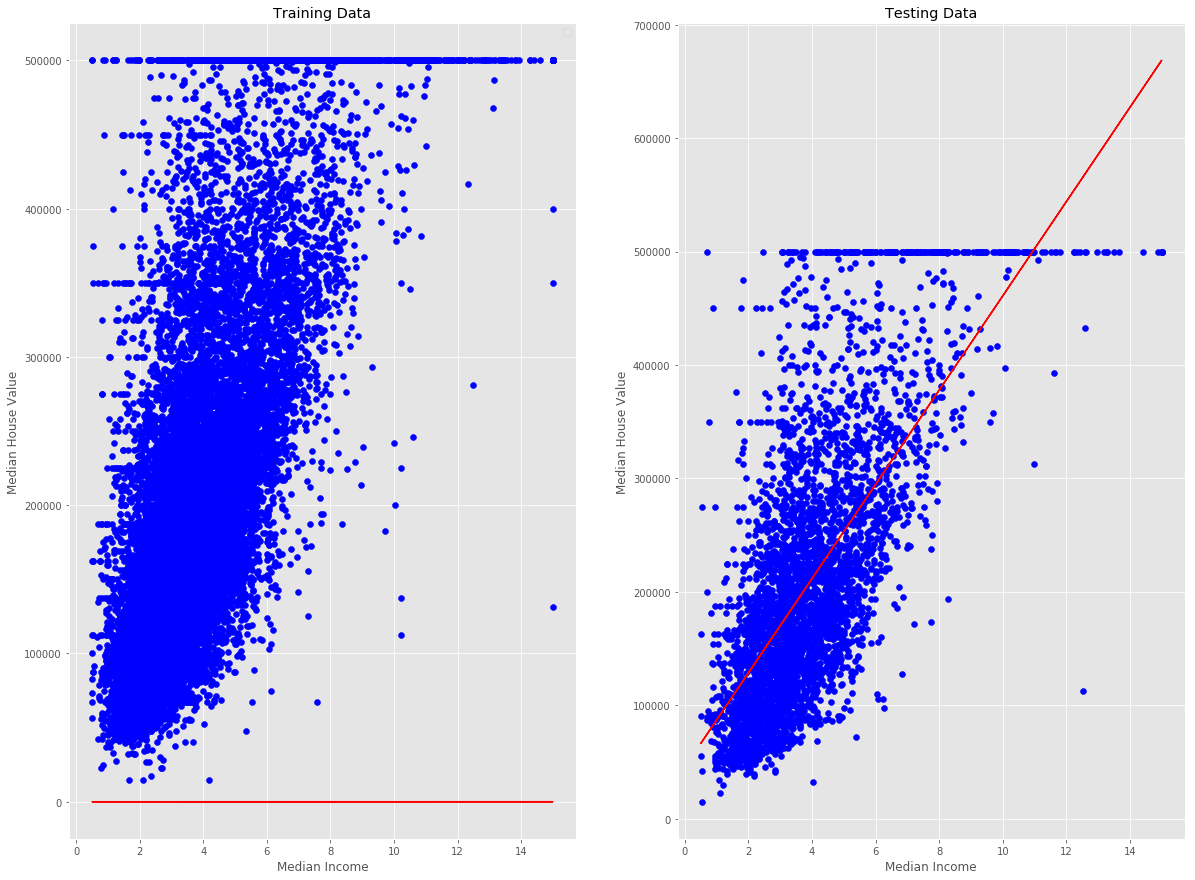

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv(r"C:\Users\shashi\Desktop\ML_WS_project\Shashi-P-Shah\California Housing-price-prediction\housing.csv")
dataset.head()
dataset.describe()
dataset.isnull().any()

features = dataset.iloc[:,:-1].values
label = dataset.iloc[:,-1].values.reshape(-1,1)

'''
from sklearn.impute import SimpleImputer
imputerNaN = SimpleImputer(missing_values="NaN",strategy="mean",copy=True)
features[:,[4]] = imputerNaN.fit_transform(features[:,[4]])
'''


imputerNaN = Imputer(missing_values="NaN",strategy="mean",axis=0)
features[:,[4]] = imputerNaN.fit_transform(features[:,[4]])

features[:,8] = LabelEncoder().fit_transform(features[:,8])
onehotencoder = OneHotEncoder(categorical_features=[8])
features = onehotencoder.fit_transform(features).toarray()

X,y=features,label 



X = dataset.median_income.values.reshape(-1,1)
y = dataset.median_house_value.values.reshape(-1,1)


X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2,random_state=33)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
y_train = StandardScaler().fit_transform(y_train)
y_train = y_train.reshape(-1)
y_test = StandardScaler().fit_transform(y_test)
y_test = y_test.reshape(-1)


model_linear = LinearRegression()
model_linear.fit(X_train,y_train)

y_pred = model_linear.predict(X_test)



plt.style.use("ggplot")
plt.figure(figsize=(20,15))

plt.subplot(1,2,1)
plt.title("Training Data")
plt.scatter(X_train,y_train,c="b")
plt.plot(X_train,model_linear.predict(X_train),c="r")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()

plt.subplot(1,2,2)
plt.title("Testing Data")
plt.scatter(X_test,y_test,c="b")
plt.plot(X_test,y_pred,c="r")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")

plt.grid(True)
plt.show()


'''
# Multivariate Linear Regression

X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2,random_state=28)

from sklearn.linear_model import LinearRegression
model_multivariate = LinearRegression()
model_multivariate.fit(X_train,y_train)


# Perform prediction and model score
y_pred = model_multivariate.predict(X_test)

plt.style.use("ggplot")
plt.figure(figsize=(20,15))

plt.subplot(1,2,1)
plt.title("Training Data")
plt.scatter(X_train,y_train,c="b")
plt.plot(X_train,model_linear.predict(X_train),c="r")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()

plt.subplot(1,2,2)
plt.title("Testing Data")
plt.scatter(X_test,y_test,c="b")
plt.plot(X_test,y_pred,c="r")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")

plt.grid(True)
plt.show()

'''